<a href="https://colab.research.google.com/github/ganesh3/pytorch-work/blob/master/Gradient_Descent_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1)
X, X.shape

(tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
         -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
         -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
         -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
         -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
         -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
         -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
         -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
         -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
         -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
         -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
          5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
          1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
          1.5000e+00,  1.6000e+00,  1.

In [3]:
#broadcast
X[:, None]

tensor([[-5.0000e+00],
        [-4.9000e+00],
        [-4.8000e+00],
        [-4.7000e+00],
        [-4.6000e+00],
        [-4.5000e+00],
        [-4.4000e+00],
        [-4.3000e+00],
        [-4.2000e+00],
        [-4.1000e+00],
        [-4.0000e+00],
        [-3.9000e+00],
        [-3.8000e+00],
        [-3.7000e+00],
        [-3.6000e+00],
        [-3.5000e+00],
        [-3.4000e+00],
        [-3.3000e+00],
        [-3.2000e+00],
        [-3.1000e+00],
        [-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7

In [4]:
func = -5 * X

In [5]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

In [6]:
Y.shape

torch.Size([100])

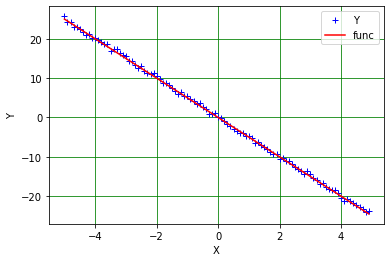

In [7]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+',label="Y")
plt.plot(X.numpy(), func.numpy(), 'r', label="func")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid('True', color='g')
plt.show()

# Batch Gradient Descent

In [8]:
# defining the function for forward pass for prediction
def forward(x):
  return w*x + b

In [9]:
# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
  return torch.mean((y_pred-y)**2)

In [10]:
w = torch.tensor(-10., requires_grad=True)
b = torch.tensor(-20., requires_grad=True)

In [11]:
step_size = 0.1
loss_BGD = []
n_iter=20

In [12]:
for i in range(n_iter):
  Y_pred = forward(X)
  loss = criterion(Y_pred, Y)
  loss_BGD.append(loss.item())
  loss.backward()
  w.data = w.data - step_size * w.grad.data
  b.data = b.data - step_size * b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()
  print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	601.6878662109375, 	-1.8683958053588867, 	-16.033296585083008
1, 	346.7549133300781, 	-7.252509117126465, 	-12.778617858886719
2, 	204.9047393798828, 	-3.6287591457366943, 	-10.228715896606445
3, 	123.5986557006836, 	-6.020301342010498, 	-8.152556419372559
4, 	75.77832794189453, 	-4.404380798339844, 	-6.515544891357422
5, 	47.047889709472656, 	-5.465829849243164, 	-5.189776420593262
6, 	29.493745803833008, 	-4.7445855140686035, 	-4.13977575302124
7, 	18.629383087158203, 	-5.215155601501465, 	-3.292562961578369
8, 	11.840628623962402, 	-4.892813205718994, 	-2.6194984912872314
9, 	7.568792343139648, 	-5.1010847091674805, 	-2.0778234004974365
10, 	4.867143154144287, 	-4.956751346588135, 	-1.6465660333633423
11, 	3.1523871421813965, 	-5.048708915710449, 	-1.300116777420044
12, 	2.0612494945526123, 	-4.983908653259277, 	-1.0238770246505737
13, 	1.3656917810440063, 	-5.0243682861328125, 	-0.8022372722625732
14, 	0.921745777130127, 	-4.9951653480529785, 	-0.6253300905227661
15, 	0.6381436

# Stochastic Gradient Descent

In [14]:
loss_SGD = []
for i in range(n_iter):
  Y_pred = forward(X)
  loss_SGD.append(criterion(Y_pred, Y).tolist())

  for x,y in zip(X, Y):
    # making a pridiction in forward pass
    y_hat = forward(x)
    loss = criterion(y_hat, y)

    loss.backward()
    # updating the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()

    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	0.7112318873405457, 	-5.847945690155029, 	0.019795969128608704
0, 	19.610727310180664, 	-1.5081133842468262, 	-0.8658840656280518
0, 	316.66644287109375, 	-18.591432571411133, 	2.693140745162964
0, 	4488.0166015625, 	44.38166046142578, 	-10.705390930175781
0, 	56554.35546875, 	-174.40499877929688, 	36.856929779052734
0, 	638863.375, 	544.955322265625, 	-123.00093078613281
0, 	6464908.5, 	-1692.549072265625, 	385.52276611328125
0, 	58407620.0, 	4879.9912109375, 	-1142.974853515625
0, 	469157632.0, 	-13314.4482421875, 	3189.034423828125
0, 	3335996416.0, 	34047.1796875, 	-8362.5830078125
0, 	20900931584.0, 	-81610.046875, 	20551.7265625
0, 	114792980480.0, 	182662.640625, 	-47210.5
0, 	549596299264.0, 	-380761.5625, 	101059.03125
0, 	2279671070720.0, 	736533.3125, 	-200912.5625
0, 	8136476852224.0, 	-1317231.25, 	369577.625
0, 	24799099224064.0, 	2168677.25, 	-626396.3125
0, 	63998670143488.0, 	-3271266.25, 	973587.0625
0, 	138503451049984.0, 	4496108.0, 	-1380162.75
0, 	248621144473

# Plotting Graphs

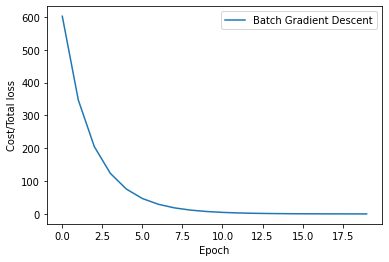

In [15]:
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

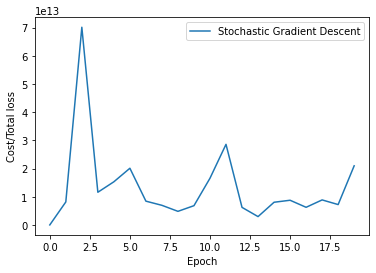

In [16]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

The loss smoothly decreases for batch gradient descent whereas there are fluctuations in the graph for stochastic gradient descent. In batch gradient descent, the loss is updated after all the training samples are processed while the stochastic gradient descent updates the loss after every training sample in the training data.